In [1]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
import seaborn as sns

%matplotlib inline
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from collections import Counter

In [2]:
# Importing item, movie date as well as user data which is all 3 data sets (reading 3 data sets into frames)

df0 = pd.read_csv('C:/Users/william.tyler/Desktop/my great learning/item.csv')
df1 = pd.read_csv('C:/Users/william.tyler/Desktop/my great learning/Data.csv')
df = pd.read_csv('C:/Users/william.tyler/Desktop/my great learning/user.csv')

In [3]:
df0 = pd.read_csv('C:/Users/william.tyler/Desktop/my great learning/item.csv')
df0.shape #item shape
#observation
#1681 rows & 22 columns for item

(1681, 22)

In [4]:
df1.shape #movie data shape
#observation
#for data, 100000 rows and 4 columns

(100000, 4)

In [5]:
df.shape #user shape
#observation
#user has 943 rows & 5 columns

(943, 5)

In [6]:
df0.head()# ITEM head

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df1.head()# movie data head

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df.head() #user data head

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
df1.info() # movie data info
df0.info()#item info
df.info()#user info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

In [10]:
df0.isnull().any() #ITEM

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

In [11]:
df.isnull().any() #user

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

In [12]:
df1.isnull().any()#movie data

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

#Observation 1: All datasets aren't missing any data.
#Observation 2: There are 19 movie genres.
#Observation 3: Movie titles can fall under more than one genre i.e "Get Shorty" is in both action and comedy genres.

In [13]:
# Dropping Movie with Category unknown, Movie Title 'Good Morning'

In [14]:
df0.drop(columns = ["movie id", "movie title", "release date"]).sum().sort_values(ascending=True)
#observation:
#only 1 unknown genre title is good morning and the most referenced genre is drama

unknown          1
Fantasy         22
Film-Noir       24
Western         27
Animation       42
Documentary     50
Musical         56
Mystery         61
War             71
Horror          92
Sci-Fi         101
Crime          109
Childrens      122
Adventure      135
Romance        247
Action         251
Thriller       251
Comedy         505
Drama          725
dtype: int64

In [15]:
df0.loc[df0['unknown'] == 1,"movie title"].values[0]

'Good Morning '

In [16]:
unknown = df0.loc[df0['unknown'] == 1,"movie id"].values[0]

In [17]:
print(unknown)

1373


In [18]:
# "good morning" in the "unknown category has been dropped"

df0.drop([unknown-2])
df0 = df0.drop([unknown-2])

In [19]:
# Find the movies that have more than one genre 

In [20]:
df0.loc[df0.drop(columns = ["movie id", "movie title", "release date"]).sum(axis = 1)>1,"movie title"]

0                Toy Story
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

In [21]:
DFGenre_Movie_Title = df0.drop(columns = ["movie id", "release date"])

In [22]:
Genre_Sum = DFGenre_Movie_Title.sum(axis = 1)

In [23]:
# All Movies with more than one genre

for index, genreSum in Genre_Sum.iteritems():
  if (genreSum > 1):
    print(DFGenre_Movie_Title.loc[index, 'movie title'])
    
    
#849 movies have more than 1 genre which means most do.

Toy Story
GoldenEye 
Get Shorty 
Copycat 
Twelve Monkeys 
Babe 
Richard III 
Seven (Se7en) 
Usual Suspects, The 
Postino, Il 
French Twist (Gazon maudit) 
From Dusk Till Dawn 
Angels and Insects 
Muppet Treasure Island 
Braveheart 
Taxi Driver 
Rumble in the Bronx 
Apollo 13 
Batman Forever 
Crimson Tide 
Desperado 
Doom Generation, The 
Free Willy 2: The Adventure Home 
Mad Love 
Net, The 
Strange Days 
Disclosure 
Dolores Claiborne 
Eat Drink Man Woman 
Ed Wood 
I.Q. 
Star Wars 
Legends of the Fall 
Natural Born Killers 
Outbreak 
Professional, The 
Pulp Fiction 
Stargate 
Santa Clause, The 
What's Eating Gilbert Grape 
While You Were Sleeping 
Crow, The 
Forrest Gump 
Four Weddings and a Funeral 
Lion King, The 
Mask, The 
Maverick 
Faster Pussycat! Kill! Kill! 
Carlito's Way 
Firm, The 
Free Willy 
Fugitive, The 
Hot Shots! Part Deux 
Hudsucker Proxy, The 
Jurassic Park 
Much Ado About Nothing 
Robert A. Heinlein's The Puppet Masters 
Sleepless in Seattle 
Blade Runner 
So I Marrie

In [24]:
#Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [25]:
df_release_year = pd.read_csv('C:/Users/william.tyler/Desktop/my great learning/item.csv')['release date']


In [26]:
rating = df1['rating']
age = df['age']
gender = df['gender']
occupation = df['occupation']

year = ""
for index, release_date in df_release_year.iteritems():
    year = "19" + release_date[-2:]
    df_release_year[index] = year
    
df0['release year'] = df_release_year

In [27]:
print(df_release_year)

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release date, Length: 1681, dtype: object


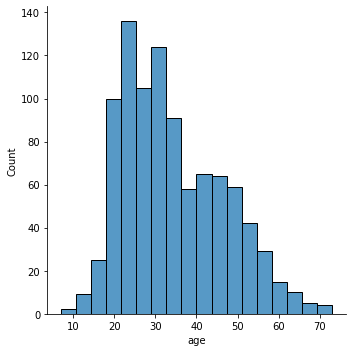

In [28]:
sns.displot(age) # distplot for age

<AxesSubplot:xlabel='rating', ylabel='count'>

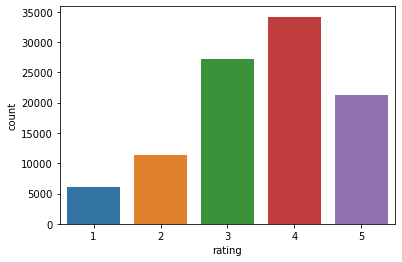

In [29]:
sns.countplot(data = df1, x='rating')

<AxesSubplot:xlabel='gender', ylabel='count'>

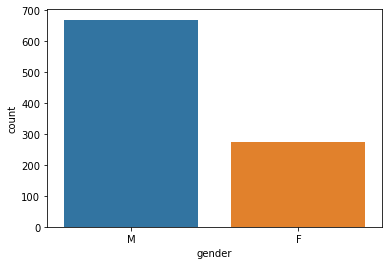

In [30]:
sns.countplot(x ="gender",data = df)

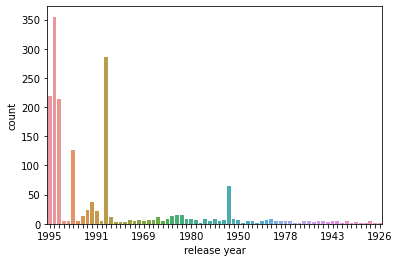

In [31]:
sns.countplot(data = df0, x = "release year")

release_year_plot = sns.countplot(data = df0, x = "release year")
for ind, label in enumerate(release_year_plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

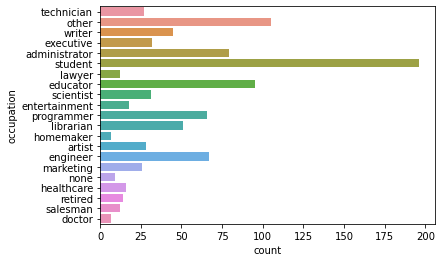

In [32]:
occ_plot = sns.countplot(y='occupation', data=df, orient="h")




In [33]:
#Question 8 Visualize how popularity of genres has changed over the years

In [34]:
popularity = pd.DataFrame(0, index=range(1922, 2000), columns=df0.columns[3:-1])
print(popularity)

      unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
1922        0       0          0          0          0       0      0   
1923        0       0          0          0          0       0      0   
1924        0       0          0          0          0       0      0   
1925        0       0          0          0          0       0      0   
1926        0       0          0          0          0       0      0   
...       ...     ...        ...        ...        ...     ...    ...   
1995        0       0          0          0          0       0      0   
1996        0       0          0          0          0       0      0   
1997        0       0          0          0          0       0      0   
1998        0       0          0          0          0       0      0   
1999        0       0          0          0          0       0      0   

      Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
1922            0      0        0          0     

In [35]:
movies = df0.groupby('release year').count().sort_values('movie id', ascending=True)['movie id']
num_movies_per_year = []
for i in range(1922, 2000):
      if (str(i) in movies.index):
       num_movies_per_year.append(movies[str(i)])
      else:
       num_movies_per_year.append(1)

In [36]:
for index, row in df0.iterrows():
  for genre in row.index[3:-1]:
    if (row[genre] == 1):
        popularity.loc[int(row['release year']), genre] += 1
popularity = popularity.div(num_movies_per_year, axis=0)
print(popularity)


      unknown    Action  Adventure  Animation  Childrens    Comedy     Crime  \
1922      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
1923      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
1924      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
1925      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
1926      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
...       ...       ...        ...        ...        ...       ...       ...   
1995      0.0  0.182648   0.100457   0.027397   0.095890  0.287671  0.050228   
1996      0.0  0.123944   0.067606   0.025352   0.059155  0.304225  0.059155   
1997      0.0  0.160839   0.069930   0.010490   0.076923  0.304196  0.104895   
1998      0.0  0.184615   0.046154   0.000000   0.015385  0.200000  0.107692   
1999      0.0  0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   

      Documentary     Drama   Fantasy  

<AxesSubplot:>

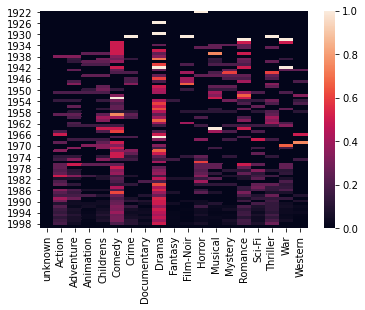

In [37]:
sns.heatmap(popularity)



In [38]:
#Question 8 observations:

#1:outside of "unknown", documentary, film-noir & fantasy are least popular in general.
#2 western looks to be popular from the early 1940s to mid 1970s.but drops off from there.
#3 Drama is most popular genre in general.
#4 only movie released in 1922 was a horror film

In [39]:
#Question 9:  Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

In [40]:
movies = df1.groupby('movie id')
df4 = pd.DataFrame(columns=['movie title', 'rating'])

In [41]:
for index, movie in movies:
  movie_id = df1.loc[index, 'movie id']
  if (movie.count()['user id'] >= 100):
    movie_title = df0[df0['movie id'] == movie_id]['movie title'].iloc[0]
    df4 = df4.append({'movie title': movie_title, 'rating': movie.mean()['rating']}, ignore_index=True) 
df4 = df4.groupby('movie title').mean()
df4 = df4.sort_values(by=['rating'], ascending=False).iloc[:25]
print(df4)

                                    rating
movie title                               
That Thing You Do!                4.491071
Good, The Bad and The Ugly, The   4.466102
Fargo                             4.358491
Abyss, The                        4.344000
Pump Up the Volume                4.292929
Full Metal Jacket                 4.292237
Peacemaker, The                   4.291667
Ice Storm, The                    4.284916
Amistad                           4.283293
Rudy                              4.265432
Stand by Me                       4.259542
Pinocchio                         4.251397
Home Alone                        4.231214
Devil in a Blue Dress             4.210145
Monty Python and the Holy Grail   4.203980
Wag the Dog                       4.198529
Jackie Chan's First Strike        4.186603
When Harry Met Sally...           4.175758
Four Rooms                        4.161616
One Flew Over the Cuckoo's Nest   4.142105
Sword in the Stone, The           4.138182
Get Shorty 

In [42]:
#Question 9

#Men watch more drama than women
#Women watch more Sci-Fi than men
#Men watch more Romance than women


In [43]:

genders = df.groupby('gender').count()
total_male = genders.iloc[1, 0]
total_female = genders.iloc[0, 0]
print(total_male, total_female)

670 273


In [44]:
#there are 670 men
#there are 273 women

In [45]:
drama = {
  'M': 0,
  'F': 0
}

scifi = {
  'M': 0,
  'F': 0
}

romance = {
  'M': 0,
  'F': 0
}

In [46]:
for index, review in movies:
  movie_id = df1.loc[index, 'movie id']
  user_id = df1.loc[index, 'user id']
  gender = df.loc[df['user id'] == user_id]['gender'].iloc[0]
  if df0.loc[movie_id, 'Drama'] == 1:
    drama[gender] += 1
  elif df0.loc[movie_id, 'Sci-Fi'] == 1:
    scifi[gender] += 1
  elif df0.loc[movie_id, 'Romance'] == 1:
    romance[gender] += 1
  

In [47]:
print(drama)
print(scifi)
print(romance)

{'M': 515, 'F': 135}
{'M': 120, 'F': 35}
{'M': 146, 'F': 33}


In [48]:
#Men watch more drama than women

male_drama_percent = 515/670

female_drama_percent = 135/273

male_scifi_percent = 120/670

female_scifi_percent = 35/273

male_romance_percent = 146/670

female_romance_percent = 33/273

In [49]:
# Do men watch more drama than women?
print (female_drama_percent)
print (male_drama_percent)

#men watch drama more than women. Almost 50% of women watch drama and men watch drama almost 77% of the time.

0.4945054945054945
0.7686567164179104


In [50]:
#Do women watch more Sci-Fi than men

print (male_scifi_percent)
print (female_scifi_percent)
#almost 18% of men watch scifi while nearly 13% of women do. So this is not true. Women do not watch more scifi than men.

0.1791044776119403
0.1282051282051282


In [51]:
#Do men watch more romance than women?

print (male_romance_percent)
print (female_romance_percent)

#Men watch more romance than women. Nearly 22% of men watch romance and approx 12% of women watch romance.


0.21791044776119403
0.12087912087912088


In [52]:
#Conclusion:

#please refer to insights/observations to help interpret the data set(s)